# **Datalog Tutorial**

## **Introduction**

A query language designed for relational databases is called Datalog. It is built on the logic programming paradigm and is intended to efficiently handle recursive queries. This tutorial will cover the syntax and meaning of Datalog and show you how to use the DLV engine to develop and run Datalog applications. Furthermore, we will tackle best practices for debugging and improving Datalog programs and present specific instances to show how Datalog is used in real-world applications.


## **Setting Up the Environment**

We will use the pydatalog library to work with Datalog in Python. Install it using:

In [ ]:
!pip install pydatalog

## **Concepts**

### **1. Schema and Database Instance**
  *   **Schema -** A limited collection of relation names and related arities make up a relational database structure. R is a relation name of arity n, as indicated by the notation R/n.


  *   **Database Instance -**  A limited collection of facts makes up a database instance. Every fact can be expressed as an expression of the type R(c1,..., cn), where ci is a constant.


Lets start by defining a simple database using Datalog facts in Python.

In [ ]:
from pyDatalog import pyDatalog

pyDatalog.clear()

# For defining database
pyDatalog.create_terms('X, Y, Red, RedCanceled, Station, Redtrip, CanAlwaysReturn, CannotAlwaysReturn')

+ Red('mons', 'ath')
+ Red('ath', 'dour')
+ Red('dour', 'mons')
+ Red('mons', 'huy')
+ Red('ans', 'mons')
+ Red('huy', 'ans')
+ Red('ans', 'spa')
+ Red('spa', 'huy')
+ RedCanceled('ans', 'mons')

# for printing all reds
print("Red relations:")
print(Red(X, Y))

print()

# for printing all RedCanceled
print("RedCanceled relations:")
print(RedCanceled(X, Y))

### **2. Fact and Rules**

* **Facts:** A fact is a fundamental claim about the world that is expressed as a predicat with particular values for its arguments. One example of a fact indicating a direct relationship between "mons" and "ath" in the database that is provided is Red('mons', 'ath').


* **Rules:** Rules, which frequently use variables, use a head (conclusion) and a body (conditions) to construct logical relationships. The conclusion is deemed true if the requirements are satisfied. CanAlwaysReturn(X), for instance:- Red(X, Y), not According to the rule CannotAlwaysReturn(X), if there is a Red link from X to any Y and it isn't on the CannotAlwaysReturn list, X can always return.

In [ ]:
from pyDatalog import pyDatalog

pyDatalog.create_terms('X, Y, Red, RedCanceled, Station, Redtrip, CanAlwaysReturn')

# Define facts
+ Red('mons', 'ath')
+ Red('ath', 'dour')
+ Red('dour', 'mons')
+ Red('mons', 'huy')
+ Red('ans', 'mons')
+ Red('huy', 'ans')
+ Red('ans', 'spa')
+ Red('spa', 'huy')
+ RedCanceled('ans', 'mons')

# for non-canceled trips rule
Redtrip(X, Y) <= Red(X, Y) & ~RedCanceled(X, Y)

# station for any point that has a Red connection
Station(X) <= Red(X, Y)

# return if there is no RedCanceled preventing return
CanAlwaysReturn(X) <= Station(X) & ~(Redtrip(X, Y) & ~Redtrip(Y, X))

# to find all stations and can return
print("Can Always Return:")
print(CanAlwaysReturn(X))

### **3. EDB AND IDB Predicate**

*   **EDB (Extensional Database) Predicate:** A relation name of the relational database schema. These predicates define existing facts in the database.

*   **IDB (Intensional Database) Predicate:** These predicates are used to define new facts inferred from existing facts through rules.

In [ ]:
from pyDatalog import pyDatalog

pyDatalog.clear()

# terms and predicates
pyDatalog.create_terms('X, Y, Red, RedCanceled, Station, Redtrip, CanAlwaysReturn, CannotAlwaysReturn')

# EDB facts
+ Red('mons', 'ath')
+ Red('ath', 'dour')
+ Red('dour', 'mons')
+ Red('mons', 'huy')
+ Red('ans', 'mons')
+ Red('huy', 'ans')
+ Red('ans', 'spa')
+ Red('spa', 'huy')
+ RedCanceled('ans', 'mons')

# IDB rules
Redtrip(X, Y) <= Red(X, Y) & ~RedCanceled(X, Y)
Station(X) <= Red(X, Y)
CannotAlwaysReturn(X) <= Redtrip(X, Y) & ~Redtrip(Y, X)
CanAlwaysReturn(X) <= Station(X) & ~CannotAlwaysReturn(X)

# Print EDB predicates
print("EDB - Red relations:")
print(Red(X, Y))
print()
print("EDB - RedCanceled relations:")
print(RedCanceled(X, Y))

print()

# Print IDB predicates from EDB predicates and rules
print("IDB - Station:")
print(Station(X))
print()
print("IDB - Redtrip (non-canceled trips):")
print(Redtrip(X, Y))
print()
print("IDB - Cannot Always Return:")
print(CannotAlwaysReturn(X))
print()
print("IDB - Can Always Return:")
print(CanAlwaysReturn(X))

### **3. Stratified Negation**

*   **Stratified Negation -** Every IDB predicate is given a non-negative integer (stratum) by stratification. If the negative predicates have lower strata than the rule's head predicate, then the negation is stratified.


In [ ]:
from pyDatalog import pyDatalog

pyDatalog.clear()

# terms and predicates
pyDatalog.create_terms('X, Y, Z, Red, RedCanceled, Station, Redtrip, CanAlwaysReturn, CannotAlwaysReturn')

#EDB facts
+ Red('mons', 'ath')
+ Red('ath', 'dour')
+ Red('dour', 'mons')
+ Red('mons', 'huy')
+ Red('ans', 'mons')
+ Red('huy', 'ans')
+ Red('ans', 'spa')
+ Red('spa', 'huy')
+ RedCanceled('ans', 'mons')

# Stratum 0:- Redtrip is derived from Red and RedCanceled without negation
Redtrip(X, Y) <= Red(X, Y) & ~RedCanceled(X, Y)

# Stratum 1:- Station is from Red
Station(X) <= Red(X, Y)

# Stratum 2: CannotAlwaysReturn uses negation and depends on Redtrip
CannotAlwaysReturn(X) <= Redtrip(X, Y) & ~Redtrip(Y, X)

# Stratum 3: CanAlwaysReturn uses negation and depends on CannotAlwaysReturn
CanAlwaysReturn(X) <= Station(X) & ~CannotAlwaysReturn(X)

# Execute queries
print("Stations:")
print(Station(X))
print()
print("Valid RedTrips:")
print(Redtrip(X, Y))
print()
print("Cannot Always Return:")
print(CannotAlwaysReturn(X))
print()
print("Can Always Return:")
print(CanAlwaysReturn(X))

### **4. Program Dependency Graph**

*   **Program Dependency Graph -** A directed edge-labeled graph in which the edges indicate rule dependencies and the vertices are IDB predicates. Negation is shown by an edge with the label "-."

Here is the PDG for our database:
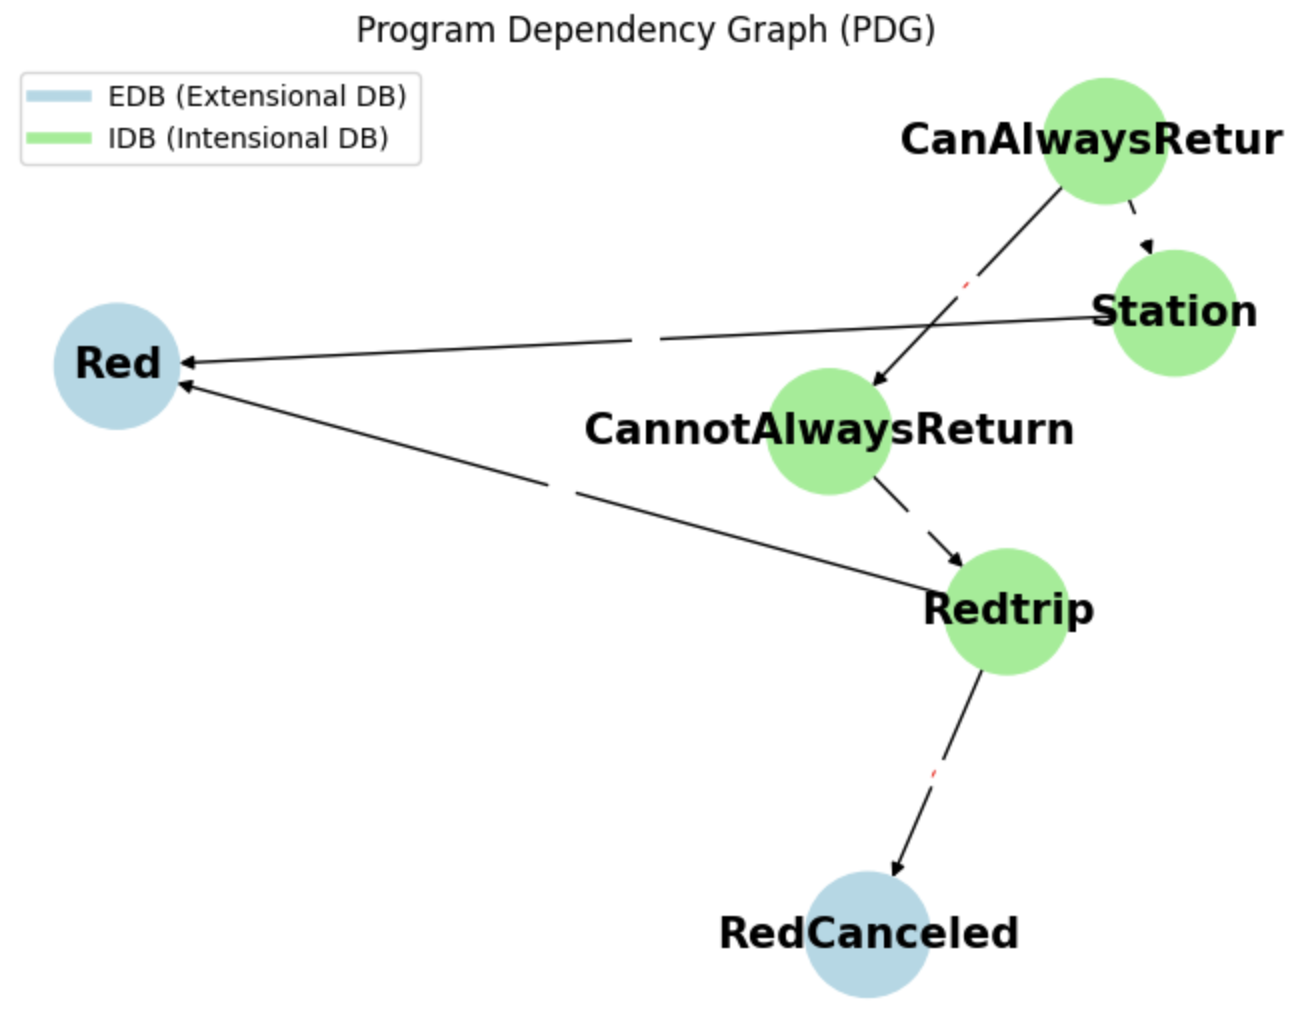


### **5. Datalog Engine**

*   **Datalog Engine:** Software called a Datalog engine is used to process Datalog programs, which are collections of facts and logical rules that are used to query and modify databases. From provided data, these engines apply logical deductions to produce new facts.

  *   **DLV Datalog Engine:** DLV is a prominent Datalog engine known for supporting advanced features:

      *   **Extensions:** DLV allows more sophisticated reasoning and problem-solving than ordinary Datalog by incorporating negation, disjunctions, and aggregates.

      *   **Stratified Datalog:**  It prevents conflicts from cycle negations by permitting negation as long as rules are stratified.
  
      You can download DLV Datalog Engine from this website: http://www.dlvsystem.com/
      
      Execution Command:


In [ ]:
%%shell

dlv -filter=CanAlwaysReturn brol.txt

## **Conclusion**

In conclusion, Datalog offers a strong foundation for logical querying and data inference, which makes it essential for a wide range of applications, including the creation of security policies, complicated database queries, and artificial intelligence. Effective management and analysis of data connections are made possible by its strengths in declarative syntax and recursive querying. While Datalog has limits, especially in its operational and mathematical capabilities, improvements like Datalog± and Recursive SQL overcome these restrictions by introducing more sophisticated features.

In this tutorial, we demonstrated how to use Datalog with the pydatalog library in Python to define a database, write rules, and query complex relationships. The code sample shows how to use stratified negation and recursive rules to find accessible nodes in a graph. You may fully utilize Datalog in your projects by adhering to best practices and utilizing efficient debugging and troubleshooting methods. For systems that rely on relational patterns and rule-based logic, Datalog is a vital tool because of its strong querying capabilities and logical foundations.